In [1]:
import cv2
import numpy as np
from skimage import morphology
import matplotlib.pyplot as plt

#### Question

Consider the following text image. Write your own algorithm (using image morphological operation) to locate the letter ‘e’ at different positions of this image.

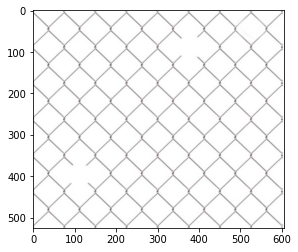

In [2]:
image = cv2.imread("images/fence.jpg")
plt.imshow(image,"gray")

#### Answer

In [3]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
gray_img.shape

(525, 605)

#### Convert to binary image and its complementary (inversion)

Text(0.5, 1.0, 'Inverted image')

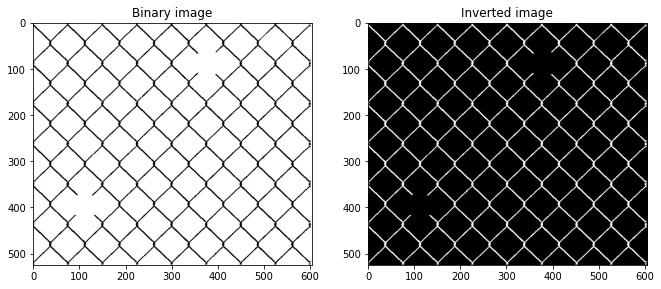

In [5]:
binr_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
invert_img = cv2.bitwise_not(binr_img)

plt.figure(figsize=(11, 17))
plt.subplot(121)
plt.imshow(binr_img,"gray")
plt.title("Binary image")
plt.subplot(122)
plt.imshow(invert_img,"gray")
plt.title("Inverted image")

#### Opening - erosion followed by dilation

In [6]:
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(invert_img, kernel, iterations=1)
opened_img = cv2.dilate(erosion, kernel, iterations=1)
#plt.imshow(dilation,"gray")

#### Closing - dilation followed by erosion

In [7]:
kernel = np.ones((3, 3), np.uint8)
dilation = cv2.dilate(invert_img, kernel, iterations=1)
closed_img = cv2.erode(dilation, kernel, iterations=1)
#plt.imshow(erosion,"gray")

Text(0.5, 1.0, 'Closed image')

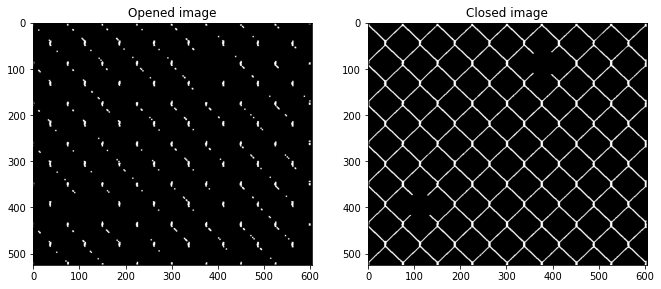

In [8]:
plt.figure(figsize=(11, 17))
plt.subplot(121)
plt.imshow(opened_img,"gray")
plt.title("Opened image")
plt.subplot(122)
plt.imshow(closed_img,"gray")
plt.title("Closed image")

Opening and Closing operations are not much of use. So let us do hit-or-miss

### Hit-or-miss transformation

#### Extract the holes from the text to find the pattern

In [23]:
br_img = binr_img[50:125, 340:415]
br_img = cv2.bitwise_not(br_img)

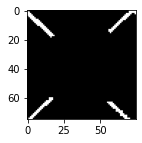

In [24]:
plt.figure(figsize=(2, 2))
plt.imshow(br_img,"gray")

In [25]:
br_img.shape

(75, 75)

In [26]:
dialated_br_img = morphology.dilation(br_img, morphology.diamond(1))
bounded_br_img = dialated_br_img - br_img 

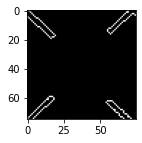

In [27]:
plt.figure(figsize=(2, 2))
plt.imshow(bounded_br_img,"gray")

#### First erosion: erode image with structure element (of shape of character to loacate, X)

In [28]:
# let us dialate the image so that the letters become clear
kernel = np.ones((3, 3), np.uint8)
dl_img = cv2.dilate(invert_img, kernel, iterations=1)
erosion_1 = cv2.erode(dl_img, br_img, iterations=1)

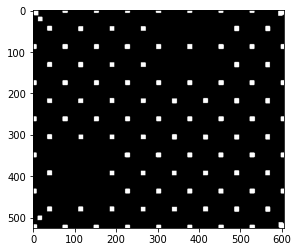

In [30]:
# after the erosion the positions of 'e' would be found but that should be dialated to be visible
kernel = np.ones((10, 10), np.uint8)
temp = cv2.dilate(erosion_1, kernel, iterations=1)
plt.imshow(temp,"gray")

#### Second erosion: erode complement of the image with structure element boundary (W-X)

In [31]:
# let us dialate the complementary image so that the letters become clear
kernel = np.ones((3, 3), np.uint8)
dl_img = cv2.dilate(binr_img, kernel, iterations=1)
erosion_2 = cv2.erode(dl_img, bounded_br_img, iterations=1)

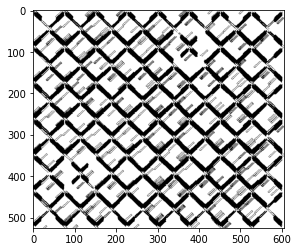

In [32]:
# plt.figure(figsize=(2, 2))
plt.imshow(erosion_2,"gray")

#### Perform AND operation on two eroded images

In [33]:
final_img = np.bitwise_and(erosion_1, erosion_2).astype(np.uint8)

Text(0.5, 1.0, 'binary image')

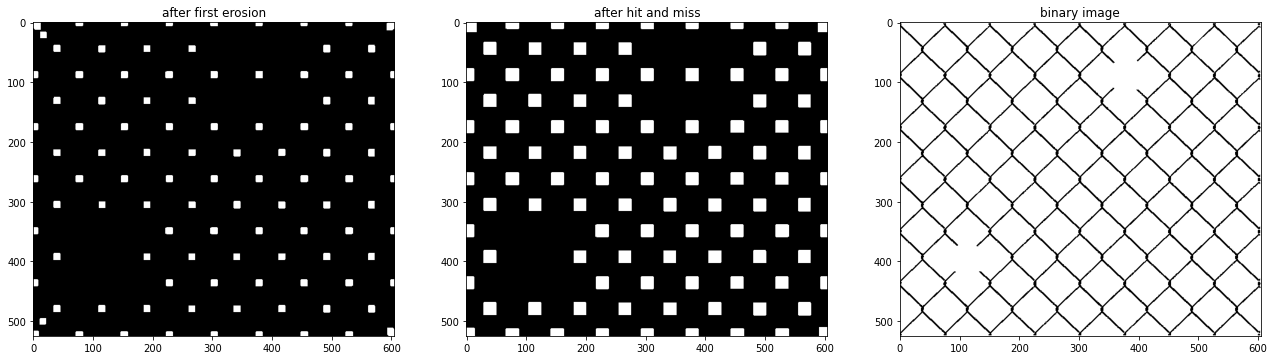

In [34]:
kernel = np.ones((20, 20), np.uint8)
dilation = cv2.dilate(final_img, kernel, iterations=1)

plt.figure(figsize=(22, 34))

plt.subplot(131)
plt.imshow(temp,"gray")
plt.title("after first erosion")

plt.subplot(132)
plt.imshow(dilation,"gray")
plt.title("after hit and miss")

plt.subplot(133)
plt.imshow(binr_img,"gray")
plt.title("binary image")


#### Tried with another way of representing 'e' like structure - but that did not work

In [46]:

S = np.array([[0,0,1,1,0],
              [0,1,0,0,1],
              [1,1,1,1,0],
              [0,1,0,0,0],
              [0,0,1,1,1]])

W = morphology.dilation(S, morphology.diamond(1))
X = W-S

In [58]:
#erosion_1 = morphology.erosion(invert_img, S).astype(np.uint8)
kernel = np.ones((3, 3), np.uint8)
dl_img = morphology.dilation(invert_img, kernel).astype(np.uint8)
erosion_1 = morphology.erosion(dl_img, S).astype(np.uint8)

In [59]:
#erosion_2 = cv2.erode(binr_img, X, iterations=1)
#erosion_2 = morphology.erosion(binr_img, X).astype(np.uint8)
kernel = np.ones((3, 3), np.uint8)
dl_img = morphology.dilation(binr_img, kernel).astype(np.uint8)
erosion_2 = morphology.erosion(dl_img, X).astype(np.uint8)

In [60]:
final_img = np.bitwise_and(erosion_1, erosion_2).astype(np.uint8)

Text(0.5, 1.0, 'after hit and miss')

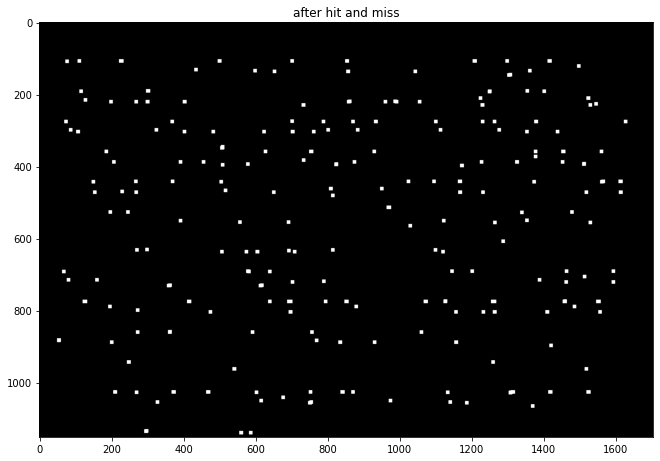

In [62]:
kernel = np.ones((10, 10), np.uint8)
dilation = cv2.dilate(final_img, kernel, iterations=1)

plt.figure(figsize=(11, 17))
plt.imshow(dilation,"gray")
plt.title("after hit and miss")